<a href="https://colab.research.google.com/github/CPTR295/ML1/blob/main/NeuralNetsWithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import sklearn
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [8]:
import tensorflow as tf
from tensorflow import keras
#!pip install scikit-learn==1.5.2

In [3]:
tf.__version__

'2.19.0'

In [4]:
keras.__version__

'3.10.0'

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(np.int32)

per_clf=Perceptron(max_iter=1000,tol=1e-3,random_state=42)
per_clf.fit(X,y)
per_clf.predict([[2,0.5]])

array([1], dtype=int32)

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_valid,X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255 #Scaling pixel to 0-1 by divding it by 255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255

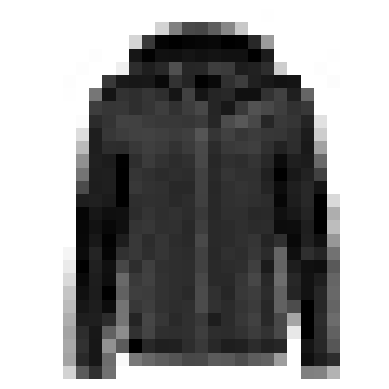

In [9]:
plt.imshow(X_train[0],cmap="binary")
plt.axis('off')
plt.show()

In [23]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
X_valid.shape

(5000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

Sequential model - Where we declare all layers in linear fashion

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu')) #300 neurons and alg to radjust wieghts
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) #10 classes and we dont want proba

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

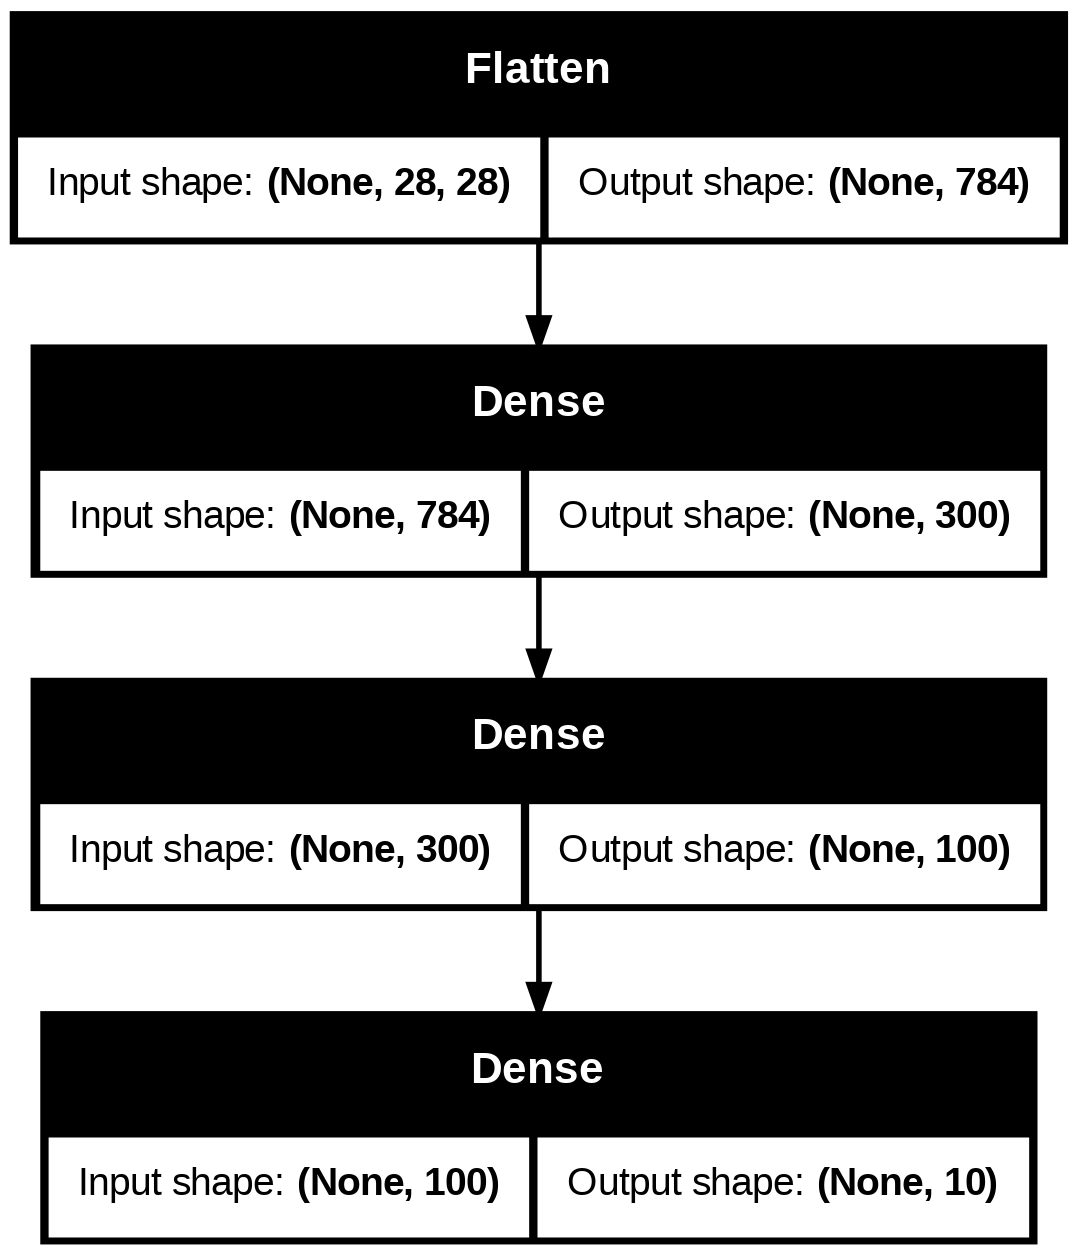

In [16]:
keras.utils.plot_model(model,"model.png",show_shapes=True)

In [17]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [18]:
weights,biases = hidden1.get_weights()

In [19]:
weights

array([[ 0.00526369, -0.05864913, -0.01754808, ..., -0.03575002,
        -0.05794483, -0.06949767],
       [ 0.0151934 , -0.01090722,  0.0167138 , ...,  0.03220341,
        -0.01406181,  0.06173499],
       [-0.03511387, -0.00442242,  0.04212671, ...,  0.04973822,
         0.01425707,  0.04612961],
       ...,
       [ 0.00547206, -0.05024121, -0.01655742, ...,  0.01113611,
         0.02702498, -0.0688376 ],
       [-0.0305564 ,  0.06411204, -0.0438569 , ...,  0.02450282,
        -0.03488867, -0.06013723],
       [ 0.02497844,  0.0161842 , -0.04495336, ...,  0.00435521,
         0.00447366,  0.03638612]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [24]:
history = model.fit(X_train,y_train,epochs=33,validation_data=(X_valid,y_valid))

Epoch 1/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6892 - loss: 0.9874 - val_accuracy: 0.8200 - val_loss: 0.5323
Epoch 2/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8225 - loss: 0.5030 - val_accuracy: 0.8472 - val_loss: 0.4469
Epoch 3/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8415 - loss: 0.4473 - val_accuracy: 0.8632 - val_loss: 0.4086
Epoch 4/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8540 - loss: 0.4158 - val_accuracy: 0.8666 - val_loss: 0.3961
Epoch 5/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8617 - loss: 0.3958 - val_accuracy: 0.8650 - val_loss: 0.3952
Epoch 6/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8647 - loss: 0.3800 - val_accuracy: 0.8704 - val_loss: 0.3710
Epoch 7/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8716 - loss: 0.3653 - val_accuracy: 0.8750 - val_loss: 0.3647
Epoch 8/33
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8735 - loss: 0.3525 -

In [25]:
history.params

{'verbose': 'auto', 'epochs': 33, 'steps': 1719}

In [26]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

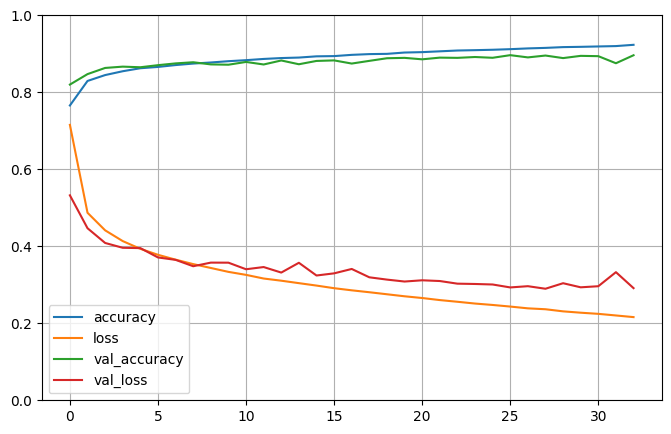

In [28]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8847 - loss: 0.3273


[0.32978102564811707, 0.8847000002861023]

In [30]:
X_new=X_test[:3]
y_proba= model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.98, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
y_pred=np.argmax(model.predict(X_new),axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([9, 2, 1])

In [26]:
print(class_names[9],class_names[2],class_names[1])

Ankle boot Pullover Trouser


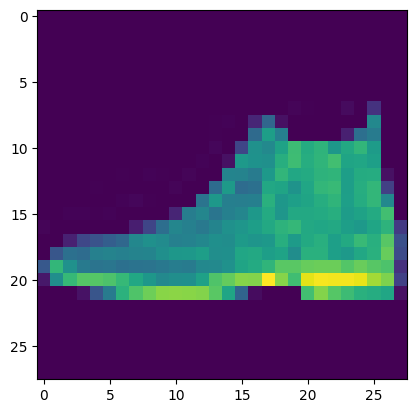

In [32]:
plt.imshow(X_new[0])
plt.show()

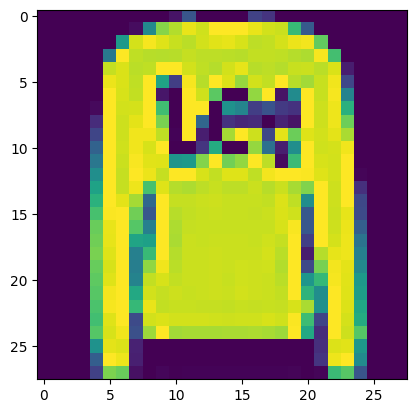

In [33]:
plt.imshow(X_new[1])
plt.show()

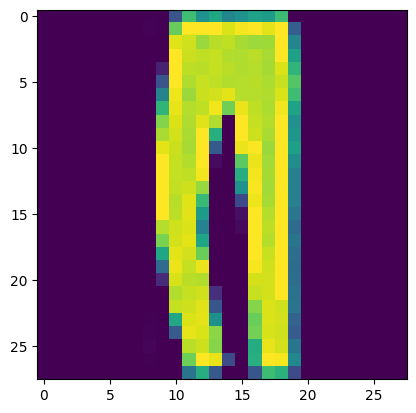

In [34]:
plt.imshow(X_new[2])
plt.show()

Regression MLP

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [2]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [53]:
X_train.shape

(11610, 8)

In [54]:
np.random.seed(42)
tf.random.set_seed(47)

In [13]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu",input_shape=[X_train.shape[1]]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6979 - val_loss: 1.3180
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9229 - val_loss: 0.7770
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7061 - val_loss: 0.7423
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6697 - val_loss: 0.7344
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6217 - val_loss: 0.6473
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6060 - val_loss: 0.6108
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5837 - val_loss: 0.5857
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5620 - val_loss: 0.5601
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5465 - val_loss: 0.5412
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5242 - val_loss: 0.5148
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5145 - val_loss: 0.4823
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

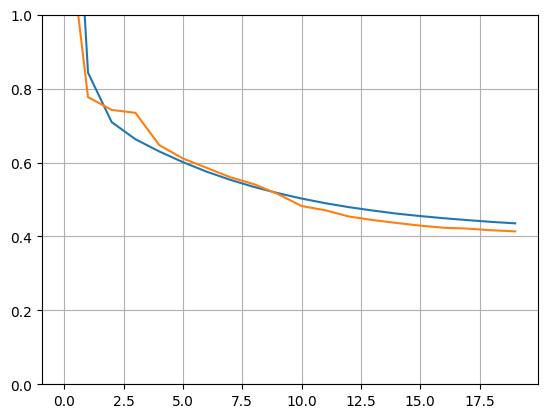

In [14]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
y_pred

array([[0.45025104],
       [1.6056255 ],
       [3.3247352 ]], dtype=float32)

Function API - To create complex topologies

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='relu')(input_)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_],outputs=[output])

In [60]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 30)        │        270 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 30)        │        930 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 38)        │          0 │ input_layer_5[0]… │
│ (Concatenate)       │                   │            │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │         39 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.0013 - val_loss: 134274.5625
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6491 - val_loss: 153058.7188
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6101 - val_loss: 142578.6719
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5828 - val_loss: 128872.2031
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5611 - val_loss: 114834.2500
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5435 - val_loss: 102725.6797
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5289 - val_loss: 91635.4141
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5168 - val_loss: 82343.2969
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5065 - val_loss: 74904.9141
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4976 - val_loss: 70378.0078
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4896 - val_loss: 67934.6641
Ep

In [64]:
y_pred = model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


array([[209.35025],
       [227.52904],
       [212.36436]], dtype=float32)

In [65]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [66]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.7302 - val_loss: 125789.9297
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8279 - val_loss: 82877.3750
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.6592 - val_loss: 76571.0859
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5962 - val_loss: 73727.6328
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5572 - val_loss: 67633.2344
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5300 - val_loss: 60259.5586
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5104 - val_loss: 52988.0742
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4959 - val_loss: 46321.6562
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4850 - val_loss: 40243.4180
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4766 - val_loss: 35333.6055
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4699 - val_loss: 31356.5117
Epoch 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [67]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [68]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [69]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - aux_output_loss: 3.6846 - loss: 3.6978 - main_output_loss: 3.6993 - val_aux_output_loss: 369947.4375 - val_loss: 240923.7969 - val_main_output_loss: 226581.3750
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - aux_output_loss: 2.2765 - loss: 1.0656 - main_output_loss: 0.9311 - val_aux_output_loss: 424785.8438 - val_loss: 171709.7969 - val_main_output_loss: 143586.4375
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 1.8484 - loss: 0.8389 - main_output_loss: 0.7268 - val_aux_output_loss: 403319.0938 - val_loss: 157700.0156 - val_main_output_loss: 130405.2344
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 1.6585 - loss: 0.7646 - main_output_loss: 0.6653 - val_aux_output_loss: 348800.3125 - val_loss: 139789.9844 - val_main_output_loss: 116563.2422
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - aux_output_loss: 1.5414 - loss: 0.7227 - main_output_loss: 0.6317 - val_aux_output_los

In [70]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - aux_output_loss: 55624.3906 - loss: 32253.5625 - main_output_loss: 29656.4258


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


Subclassing API

In [74]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [77]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.1559 - mse_loss: 4.4543 - val_loss: 240871.6875 - val_mse_loss: 222735.1250
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.2141 - mse_loss: 3.1363 - val_loss: 198573.9531 - val_mse_loss: 479647.3125
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.8594 - mse_loss: 2.1972 - val_loss: 181176.2344 - val_mse_loss: 607793.2500
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7459 - mse_loss: 1.8424 - val_loss: 172169.3125 - val_mse_loss: 633763.3750
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6903 - mse_loss: 1.6816 - val_loss: 161790.4062 - val_mse_loss: 614213.3750
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6532 - mse_loss: 1.5873 - val_loss: 150470.4688 - val_mse_loss: 579448.1250
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6248 - mse_loss: 1.5211 - val_loss: 138660.6406 - val_mse_loss: 541950.0625
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━

In [79]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
y_pred_main, y_pred_aux

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


(array([[206.72359],
        [231.47887],
        [204.13089]], dtype=float32),
 array([[487.31876],
        [548.15784],
        [459.777  ]], dtype=float32))

Saving and Restoring

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=0.0001))
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7.2653 - val_loss: 34736.8906
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.0467 - val_loss: 374.9827
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7741 - val_loss: 12532.6191
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9160 - val_loss: 41143.9141
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3109 - val_loss: 70414.0234
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8854 - val_loss: 91341.3672
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5871 - val_loss: 99557.0391
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3726 - val_loss: 97563.4062
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.2133 - val_loss: 89502.7422
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0909 - val_loss: 78721.9766


In [83]:
mse_test = model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68277.5703


In [85]:
model.save("my_keras.h5") # we can use keras.models.load_model to load

Using Callbacks during training

In [88]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [90]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras.h5',save_best_only=True)
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.2099 - val_loss: 155526.4844
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8185 - val_loss: 88149.5859
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7341 - val_loss: 71269.4766
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6944 - val_loss: 65792.3047
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6614 - val_loss: 62617.8164
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6322 - val_loss: 60011.7695
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6058 - val_loss: 57711.8281
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5820 - val_loss: 55451.9844
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5603 - val_loss: 52732.9492
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5405 - val_loss: 50396.1250


In [96]:
model = keras.models.load_model('my_keras.h5',
                               custom_objects={'mse': keras.metrics.MeanSquaredError()}) #get best model

In [97]:
mse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 67669.6406


In [98]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8797

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8761 - val_loss: 13453.7988
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6660 - val_loss: 20566.5527
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6212 - val_loss: 15136.4482
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5852 - val_loss: 13553.9248
Epoch 5/100
341/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5573

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5551 - val_loss: 11605.7148
Epoch 6/100
340/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5318

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5297 - val_loss: 10517.5215
Epoch 7/100
336/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5102

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5079 - val_loss: 9797.5752
Epoch 8/100
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4901

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4894 - val_loss: 9174.6084
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4739

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4738 - val_loss: 9116.1465
Epoch 10/100
334/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4629

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4609 - val_loss: 9092.8281
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4503 - val_loss: 9467.0469
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4414 - val_loss: 9808.7754
Epoch 13/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4338 - val_loss: 10215.3730
Epoch 14/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4272 - val_loss: 10747.4727
Epoch 15/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4214 - val_loss: 11237.5898
Epoch 16/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4163 - val_loss: 11804.9590
Epoch 17/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4117 - val_loss: 12348.1621
Epoch 18/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4075 - val_loss: 12952.6934
Epoch 19/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4038 - val_loss: 13460.9785
Epoch 20/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4004 - val_loss: 13935.9316
162/

In [99]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [100]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4510
val/train: 21939.31
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4503 - val_loss: 9467.0469


Hyperparameter Tuning

In [101]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
def build_model(n_hidden=1,n_neurons=30,learning_rate=3e-3,input_shape=[8]):
  model=keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layers in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons,activation='relu'))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss='mse',optimizer=optimizer)
  return model

In [4]:
!pip install scikeras[tensorflow]


In [5]:
from scikeras.wrappers import KerasRegressor
keras_reg = KerasRegressor(build_model)

In [10]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9602 - val_loss: 2.1902
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6323 - val_loss: 1.7407
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5471 - val_loss: 0.4926
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5027 - val_loss: 0.5838
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4572 - val_loss: 0.4618
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4486 - val_loss: 0.4945
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4108 - val_loss: 0.6578
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4108 - val_loss: 0.4529
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4252 - val_loss: 0.5642
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4059 - val_loss: 0.4986
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4116 - val_loss: 0.5804
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

KerasRegressor(
	model=<function build_model at 0x79985233bd80>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [11]:
mse_test = keras_reg.score(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [16]:
y_pred=keras_reg.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [17]:
y_pred

array([0.57669234, 1.5475332 , 4.1536674 ], dtype=float32)